In [1]:
import pandas as pd
file_path = "./ref/경기도의정부시_경전철승하차현황_20250131.csv"
df = pd.read_csv(file_path, encoding="EUC-KR")
df.head()

,일자,역명,합계(승차),합계(하차),04시(승차),04시(하차),5시(승차),5시(하차),6시(승차),6시(하차),...,21시(승차),21시(하차),22시(승차),22시(하차),23시(승차),23시(하차),00시(승차),00시(하차),01시(승차),01시(하차)
0,2025-01-01,발곡,1679,1759,16,0,40,32,44,44,...,26,70,14,86,13,39,2,28,0,0
1,2025-01-01,회룡,4192,4773,7,1,53,147,91,137,...,205,104,158,94,108,29,23,20,0,0
2,2025-01-01,범골,1454,1367,0,0,22,19,27,18,...,20,66,21,48,7,37,3,7,0,0
3,2025-01-01,경전철의정부,1585,1960,8,0,50,10,37,33,...,117,53,77,35,37,20,18,4,0,0
4,2025-01-01,의정부시청,592,643,1,1,11,48,10,30,...,20,19,14,21,5,9,0,5,0,0


In [2]:
columns1 = ['date','name','type_in','type_out']
time_col = [f"{i}H" for i in range(4,26)]*2
columns = columns1 + time_col
df.columns = columns
df = df.loc[:,:'type_out']

In [3]:
df.head()

,date,name,type_in,type_out
0,2025-01-01,발곡,1679,1759
1,2025-01-01,회룡,4192,4773
2,2025-01-01,범골,1454,1367
3,2025-01-01,경전철의정부,1585,1960
4,2025-01-01,의정부시청,592,643


In [9]:
df['total'] = df['type_in'] + df['type_out']
df = df.drop(columns=['type_in', 'type_out'])
df.head()

,date,name,total
0,2025-01-01,발곡,3438
1,2025-01-01,회룡,8965
2,2025-01-01,범골,2821
3,2025-01-01,경전철의정부,3545
4,2025-01-01,의정부시청,1235


In [10]:
data = df.groupby(['name','date']).sum().reset_index()
data

,name,date,total
0,경기도청북부청사,2025-01-01,3274
1,경기도청북부청사,2025-01-02,6380
2,경기도청북부청사,2025-01-03,6711
3,경기도청북부청사,2025-01-04,5252
4,경기도청북부청사,2025-01-05,3572
...,...,...,...
460,흥선,2025-01-27,3162
461,흥선,2025-01-28,2352
462,흥선,2025-01-29,1990
463,흥선,2025-01-30,2281


In [11]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True]) # 같은 이름으로해서 덮어쓰기(누적 조심) # False는 거꾸로
gdata.head(10)

,name,date,total
0,경기도청북부청사,2025-01-01,3274
1,경기도청북부청사,2025-01-02,6380
2,경기도청북부청사,2025-01-03,6711
3,경기도청북부청사,2025-01-04,5252
4,경기도청북부청사,2025-01-05,3572
5,경기도청북부청사,2025-01-06,6654
6,경기도청북부청사,2025-01-07,6610
7,경기도청북부청사,2025-01-08,6169
8,경기도청북부청사,2025-01-09,5493
9,경기도청북부청사,2025-01-10,6402


In [12]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,경기도청북부청사,169660
1,경전철의정부,161374
2,곤제,69419
3,동오,132790
4,발곡,168402
5,범골,150025
6,새말,87774
7,송산,117775
8,어룡,134743
9,의정부시청,91335


In [13]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20) # 어디서 제일 많이 타고내렸는지
total_data = sdata[:20]
total_data

,name,total
12,회룡,552070
10,의정부중앙,215603
0,경기도청북부청사,169660
4,발곡,168402
1,경전철의정부,161374
5,범골,150025
8,어룡,134743
3,동오,132790
14,흥선,127921
7,송산,117775


In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf" # 앞에 ./붙여주기
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

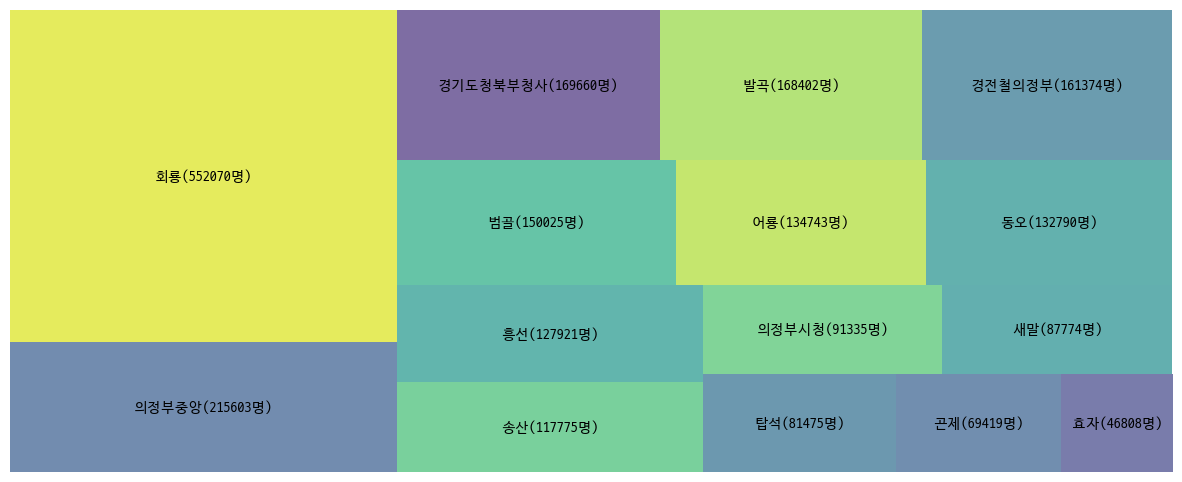

In [22]:
import squarify
plt.figure(figsize=(15,6))
squarify.plot(sizes=total_data['total'], label = [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size']=9
# plt.rcParams['text.color']='blue'
plt.gca().invert_yaxis() # 축 뒤집기
plt.axis("off") # 축 인덱스 없애기
plt.show()